# Метод Монте-Карло для вычисления интегралов

Рассмотрим задачу вычисления определённого интеграла

$
I = \int_a^b f(x)\, dx
$

Идея метода Монте-Карло: вместо точного интегрирования
использовать случайные точки, распределённые на отрезке `[a, b]`
или внутри ограничивающего прямоугольника, и оценить интеграл
по частоте попаданий (hit-or-miss) или по среднему значению функции.


## Постановка задачи

1. Пусть задана функция `f(x)` и отрезок `[a, b]`.
2. Строим прямоугольник, который полностью содержит график функции
   на этом промежутке (определяем минимум и максимум значений функции).
3. Случайным образом выбираем `N` точек внутри прямоугольника.
4. Считаем количество попаданий точек **под график функции**.
5. Используем:
   - метод «hit-or-miss» (по площади прямоугольника и доле попаданий);
6. Сравниваем результаты с эталонным численным интегралом (правило трапеций).


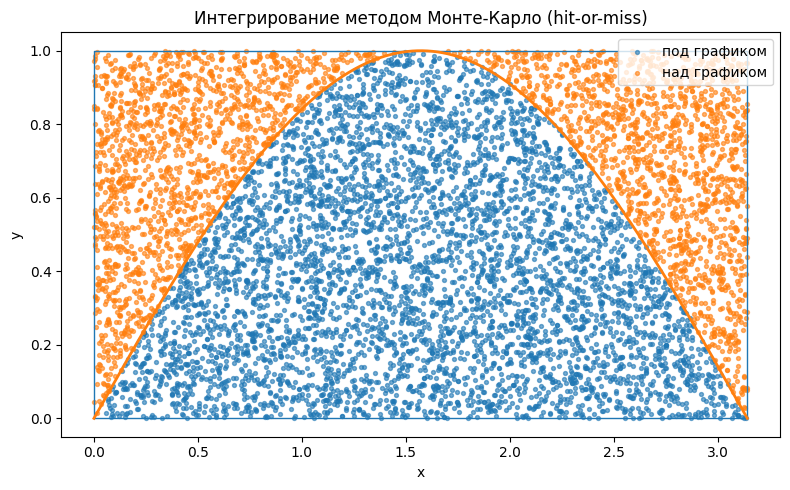

,a,b,ymin (≈),ymax (≈),Площадь прямоугольника,Количество точек,Попаданий,Промахов,Интеграл (hit-or-miss),Интеграл (trapz эталон)
0,0.0,3.141593,0.0,1.0,3.141592,8000,5034,2966,1.976847,2.0


In [1]:
# Универсальный код для интегрирования методом Монте-Карло

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def f(x: np.ndarray) -> np.ndarray:
    return np.sin(x)


a, b = 0.0, np.pi  # границы интегрирования
N = 8000  # количество случайных точек
grid_points = 5000  # плотность сетки для оценки min/max и эталона
# ---------------------------------------

# Создаём сетку для оценки минимума/максимума и построения графика
xs_grid = np.linspace(a, b, grid_points)
ys_grid = f(xs_grid)

ymin = float(np.min(ys_grid))
ymax = float(np.max(ys_grid))

# Если функция почти константна — немного расширяем границы по y
if np.isclose(ymin, ymax):
    pad = 1e-6
    ymin -= pad
    ymax += pad

rect_height = ymax - ymin
rect_width = b - a
rect_area = rect_width * rect_height

# Генерация случайных точек в прямоугольнике
rng = np.random.default_rng()
xs = rng.uniform(a, b, size=N)
ys = rng.uniform(ymin, ymax, size=N)

# Проверяем, попала ли точка под график функции
f_xs = f(xs)
hits = ys <= f_xs
num_hits = int(np.count_nonzero(hits))
num_misses = N - num_hits

# --- Оценки интеграла ---
# 1) метод hit-or-miss
integral_hit_or_miss = rect_area * (num_hits / N) + ymin * rect_width

# 2) эталонное численное интегрирование (трапеции)
integral_ref = float(np.trapezoid(ys_grid, xs_grid))

# --- Визуализация ---
plt.figure(figsize=(8, 5))
plt.plot([a, b, b, a, a], [ymin, ymin, ymax, ymax, ymin], linewidth=1)  # прямоугольник
plt.plot(xs_grid, ys_grid, linewidth=2)  # график функции
plt.scatter(xs[hits], ys[hits], s=8, alpha=0.6, label="под графиком")  # попадания
plt.scatter(xs[~hits], ys[~hits], s=8, alpha=0.6, label="над графиком")  # промахи
plt.title("Интегрирование методом Монте-Карло (hit-or-miss)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

# --- Таблица результатов ---
data = {
    "a": [a],
    "b": [b],
    "ymin (≈)": [ymin],
    "ymax (≈)": [ymax],
    "Площадь прямоугольника": [rect_area],
    "Количество точек": [N],
    "Попаданий": [num_hits],
    "Промахов": [num_misses],
    "Интеграл (hit-or-miss)": [integral_hit_or_miss],
    "Интеграл (trapz эталон)": [integral_ref],
}

df = pd.DataFrame(data)
df